## Questões da prova

#### 8) Julgue as afirmativas a seguir como verdadeiras ou falsas, justificando sua resposta para as afirmativas falsas, se houver alguma

1 - Com a aplicação de técnicas de regularização, overfitting é evitado a partir da redução do espaço de hipóteses acessível;
    verdadeiro

2 - A regularização L1 (lasso), pode implementar feature selection, ao efetivamente zerar os parâmetros referentes a determinadas features;
    verdadeiro

3 - A regularização L2 (ridge), pode implementar feature selection, ao efetivamente zerar os parâmetros referentes a determinadas features;
    falso

Julgando as afirmativas 1, 2 e 3, temos, respectivamente:

(X) Verdadeiro / Verdadeiro / Falso

( ) Verdadeiro / Verdadeiro / Verdadeiro

( ) Verdadeiro / Falso / Verdadeiro

( ) Falso / Falso / Falso

----
----

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples = 400,
                       n_features = 5, n_informative = 3, 
                       noise = 25,
                       random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Ao treinar e avaliar um modelo de regressão linear (todos os hiperparâmetros default), qual é a diferença entra o erro absoluto médio (MAE), calculado nas bases de teste e treino?

( ) 2.56

( ) 0.88

(X) Impossível de calcular esta métrica para os dados disponibilizados

( ) 0

( ) -3.14

In [60]:
# tamanho das bases
X_train.shape, y_train.shape, X_test.shape, y_test.shape 

((280, 5), (280,), (120, 5), (120,))

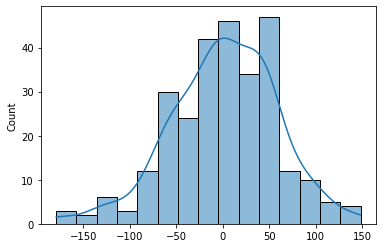

In [61]:
sns.histplot(y_train, kde = True);
# Próximo de uma distribuição normal

In [62]:
def plot_scatter_real_pred(y_test, y_pred):
    
    x = np.linspace(0, y_test.max())
    y = x

    plt.title("Target real x target predito")
    
    plt.plot(x, y, color="red", ls=":")

    sns.scatterplot(x=y_test, y=y_pred)

    plt.xlabel("Real")
    plt.ylabel("Predito")

    plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score


def reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True):

    # ===============================
    # passo 1 - construção do modelo

    reglin = LinearRegression()

    reglin.fit(X_train, y_train)

    # ===============================
    # passo 2 - avaliação do modelo

    y_pred = reglin.predict(X_test)
    
    print("\nMétricas de avaliação (dados de teste):\n")

    if plot:
        plot_scatter_real_pred(y_test, y_pred)

    
    print(f"MAE, test: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MAE, train: {mean_absolute_error(y_train, y_pred):.2f}")
    #print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    #print(f"MAPE: {(mean_absolute_percentage_error(y_test, y_pred))*100:.2f}%")

    residuos = y_test - y_pred
    print("\nDistribuição dos resíduos:\n")
    print(pd.DataFrame(residuos).describe())
    
    if plot:
        sns.histplot(residuos, kde=True)
        plt.show()
        
    # new: returnando o objeto do modelo treinado!
    return reglin


Métricas de avaliação (dados de teste):



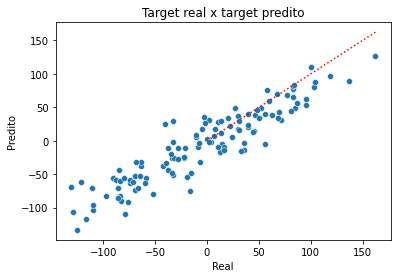

MAE, test: 19.86


ValueError: Found input variables with inconsistent numbers of samples: [280, 120]

In [64]:
reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, plot=True)

----